In [14]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
from sklearn.preprocessing import robust_scale, scale
from sklearn.decomposition import PCA

import pandas as pd

In [2]:
df = pd.read_csv('data/galaxies.csv', sep=',')
df

,psfMag_r,petroR50_r,petroR90_r,petroMag_r,deVRad_r,deVAB_r,deVMag_r,expRad_r,expAB_r,expMag_r,spiral,elliptical
0,19.58628,2.671376,5.343580,17.59715,6.374214,0.631997,17.16552,2.997577,0.659106,17.58458,1,0
1,20.32196,3.664548,8.355562,17.60038,9.469381,0.940098,17.03176,3.546690,0.872055,17.65922,1,0
2,20.38456,2.966682,5.863712,17.67674,10.590420,0.628519,17.02638,3.716945,0.656786,17.59097,1,0
3,19.11704,1.868823,6.223657,17.60155,2.801045,0.428941,17.52136,1.520812,0.434825,17.92932,0,1
4,17.95364,7.799004,16.797420,14.85757,16.863040,0.594300,14.61427,9.120167,0.566243,14.96915,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251310,19.82897,3.116627,6.251563,17.61494,7.936457,0.864553,17.06226,3.087852,0.910495,17.59218,1,0
251311,19.32683,2.137505,5.073896,17.72004,5.446148,0.247232,17.40667,2.949138,0.283849,17.70498,1,0
251312,19.64636,3.073566,7.423342,17.48737,10.359820,0.242674,17.05190,4.613110,0.275633,17.45775,1,0
251313,19.79040,3.093848,6.690452,17.51516,12.325270,0.340086,16.91184,4.505969,0.399962,17.43965,1,0


In [17]:
X = df.values
X0 = X[:,:-2]
# X0 = scale(X0)
print(X0[:10])

[[19.58628    2.671376   5.34358   17.59715    6.374214   0.6319973
  17.16552    2.997577   0.6591055 17.58458  ]
 [20.32196    3.664548   8.355562  17.60038    9.469381   0.940098
  17.03176    3.54669    0.8720555 17.65922  ]
 [20.38456    2.966682   5.863712  17.67674   10.59042    0.6285191
  17.02638    3.716945   0.656786  17.59097  ]
 [19.11704    1.868823   6.223657  17.60155    2.801045   0.4289412
  17.52136    1.520812   0.4348252 17.92932  ]
 [17.95364    7.799004  16.79742   14.85757   16.86304    0.5942999
  14.61427    9.120167   0.5662426 14.96915  ]
 [18.86017    3.020336   6.508351  16.19929    7.939524   0.6415641
  15.85427    3.576859   0.6434373 16.19755  ]
 [19.27657    2.008497   4.777721  17.70078    5.126379   0.241256
  17.3764     2.720811   0.2754422 17.69655  ]
 [18.91784    1.592836   4.248657  17.62044    3.296936   0.1940127
  17.42436    2.0926     0.2248335 17.65417  ]
 [18.83547    3.375082   8.591132  16.59919    7.06351    0.7501473
  16.23562    

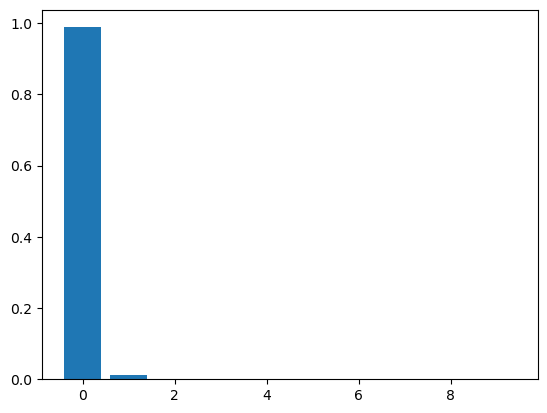

In [18]:
pca_sk = PCA()
pca_sk.fit(X0)
plt.bar(range(X0.shape[1]), pca_sk.explained_variance_ratio_)
plt.show()

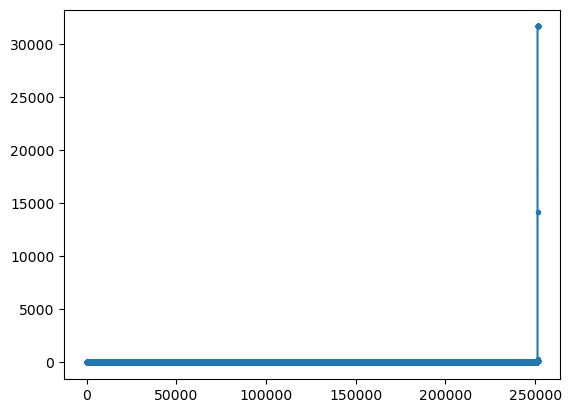

[1.81170854e+01 2.45420467e+00 7.23154812e+00 1.63114770e+01
 6.14004186e+00 8.77095380e-03 1.60513834e+01 2.69444245e+00
 2.47525250e-02 1.64362882e+01 7.53337445e-01 2.46662555e-01]


In [4]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=3)
plt.show()
print(c0)

0.9999920418598174
[1.81170854e+01 2.45420467e+00 7.23154812e+00 1.63114770e+01
 6.14004186e+00 8.77095380e-03 1.60513834e+01 2.69444245e+00
 2.47525250e-02 1.64362882e+01 7.53338105e-01 2.46661895e-01]


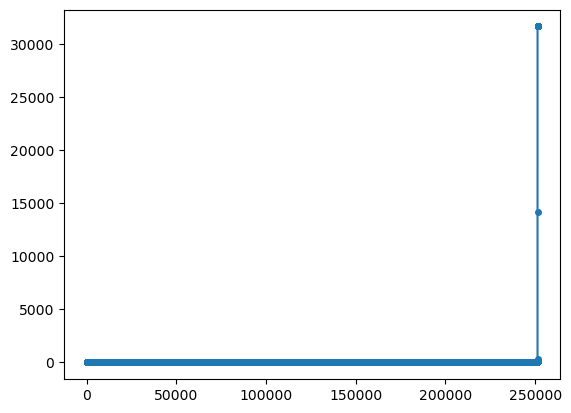

In [6]:
N = len(X0)
alpha = (N - 2) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4)
plt.show()

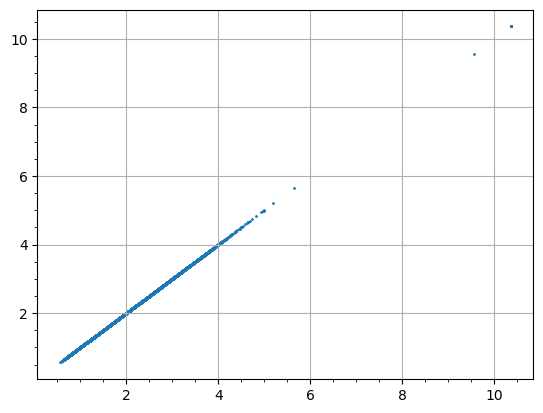

In [7]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(np.log(D0+1), np.log(D1+1), s=1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [8]:
X1_0 = X0 - c0
X1 = X0 - c

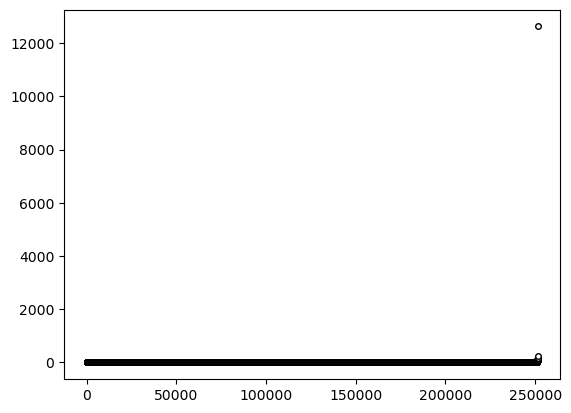

55966.07778419255 [ 3.15561587e-01  3.19694207e-01  3.19949820e-01  3.15470705e-01
  3.15470524e-01  3.14980341e-01  3.15457738e-01  3.15187530e-01
  3.14980433e-01  3.15472887e-01  9.93285713e-06 -9.93285713e-06]


In [9]:
a1_0, L1_0 = pca.find_pc(X1_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L1_0, a1_0)

0.9999960209299087
55805.5137693317 [ 3.16478368e-01  3.16063431e-01  3.16317597e-01  3.16388646e-01
  3.16380346e-01  3.15892161e-01  3.16375228e-01  3.16098773e-01
  3.15892205e-01  3.16390214e-01  1.01031805e-05 -1.01031805e-05]


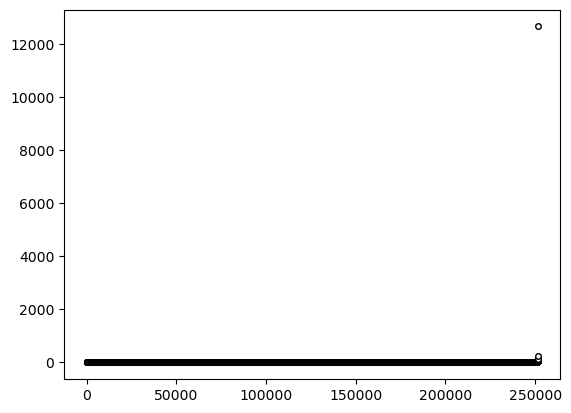

In [12]:
N = len(X0)
alpha = (N - 1) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
U1 = pca.project_line(X0, a1)
U1_0 = pca.project_line(X0, a1_0)

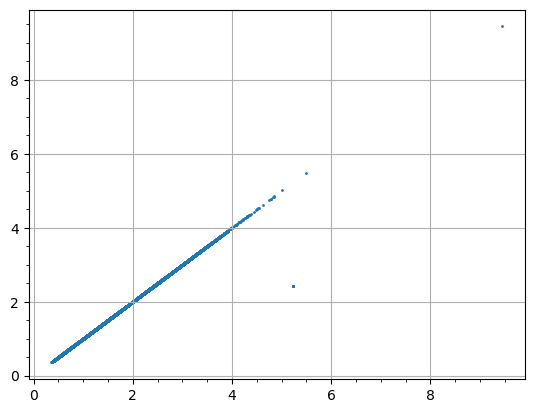

In [13]:
plt.scatter(np.log(pca.distance_line(X1_0, a1_0)+1), np.log(pca.distance_line(X1, a1)+1), s=1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [10]:
def find_pc_all(X0):
    Ls = []
    As = []
    Us = []
    n = X0.shape[1]
    X = X0
    for i in range(n):
        a, L = pca.find_pc(X)
        U = pca.project_line(X0, a)
        X = pca.project(X, a)
        Ls.append(L)
        As.append(L)
        Us.append(U)
    Ls = np.array(Ls)
    return As, Ls, Us
        
def find_rob_pc_all(X0, wma):
    Ls = []
    As = []
    Us = []
    n = X0.shape[1]
    X = X0
    for i in range(n):
        a, L = pca.find_rob_pc(X, wma)
        U = pca.project_line(X0, a)
        X = pca.project(X, a)
        Ls.append(L)
        As.append(L)
        Us.append(U)
    Ls = np.array(Ls)
    return As, Ls, Us


In [52]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

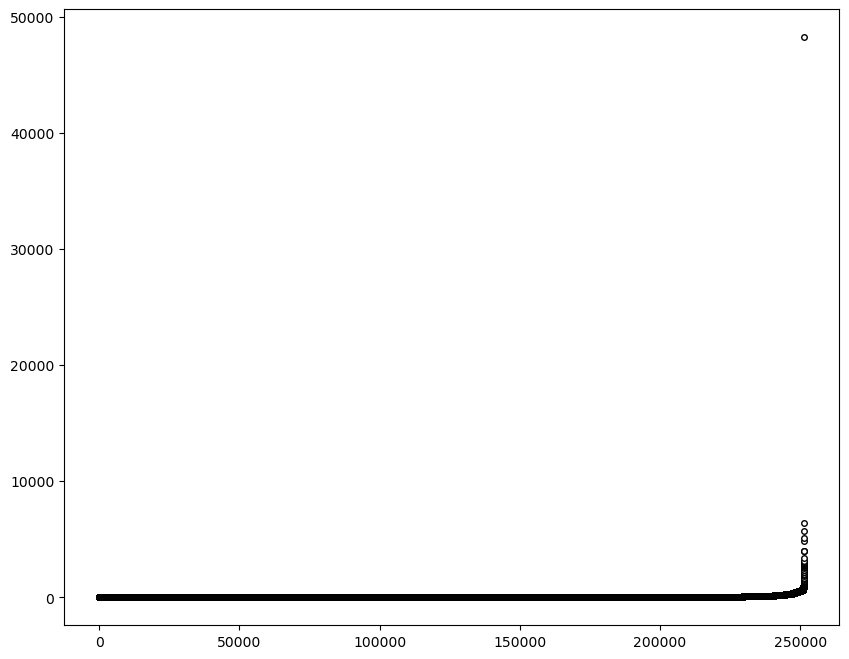

646.5251288896444 [-0.16299046  0.62391082  0.63716296 -0.16491684 -0.14818107 -0.16009124
 -0.16464607 -0.15353347 -0.16015591 -0.16455272]


In [53]:
a2_0, L2_0 = pca.find_pc(X2_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2_0, a2_0)

0.9999204185981736


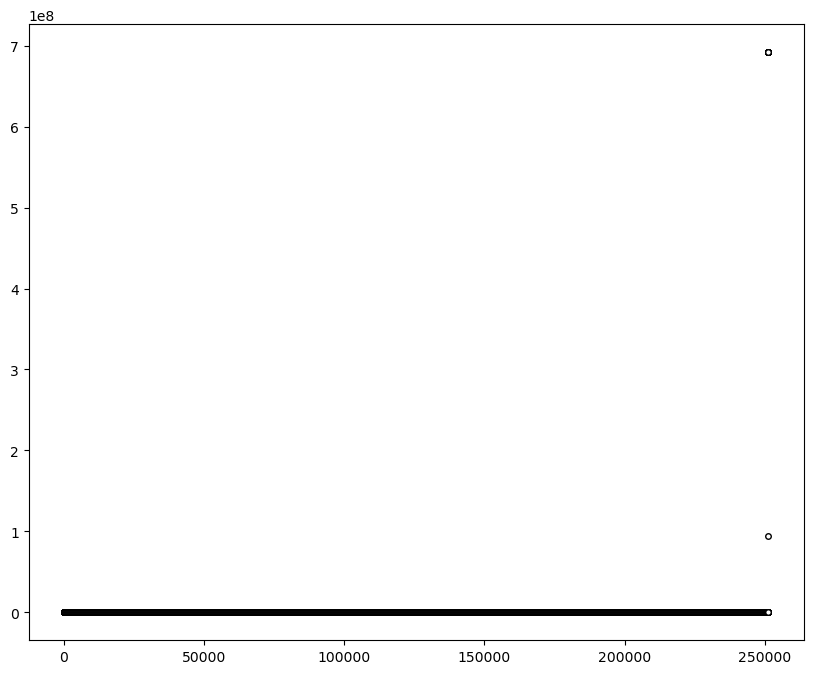

6.230835498557404 [ 0.29334807 -0.11694225 -0.72657938  0.29474951  0.38934473  0.01510539
  0.25292172  0.05390384  0.02028891  0.2576284 ]


In [54]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.95)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2, a2)
U2 = pca.project_line(X0, a2)
U2_0 = pca.project_line(X0, a2_0)

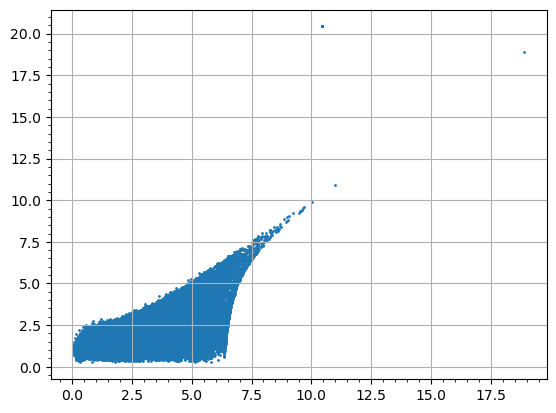

In [56]:
plt.scatter(np.log(pca.distance_line(X2_0, a1_0)+1), np.log(pca.distance_line(X2, a1)+1), s=1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [26]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

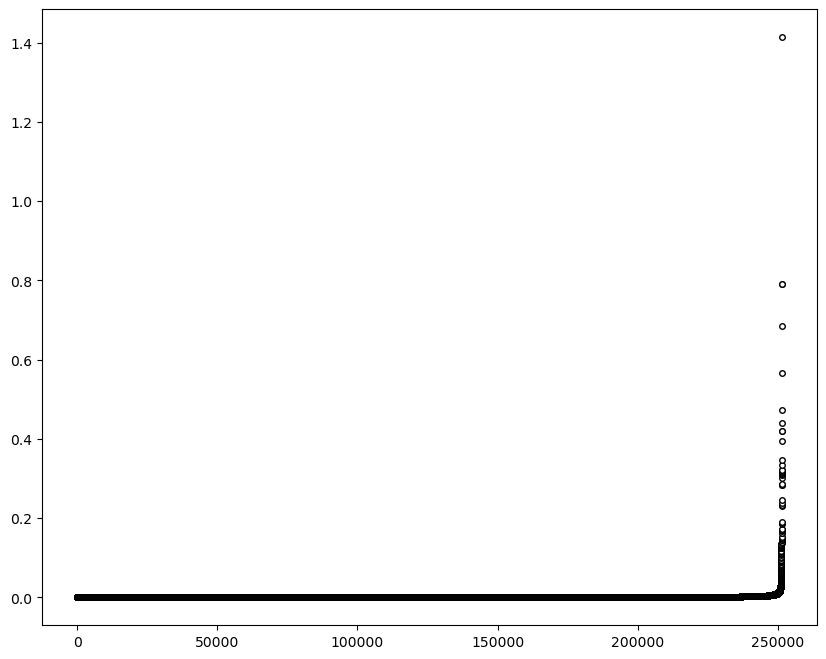

0.005077397678754547 [ 0.10880471  0.14652639 -0.12476852  0.21450636 -0.83411454  0.13970858
  0.23427842 -0.25289216  0.14103858  0.22608216]


In [27]:
a3_0, L3_0 = pca.find_pc(X3_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L3_0, a3_0)

0.9999204185981736


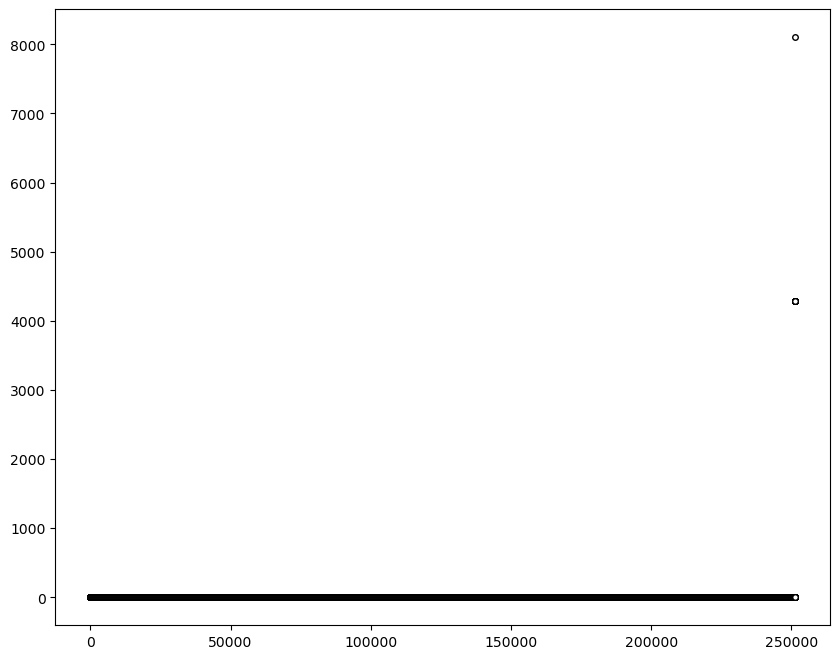

0.001222742303394681 [ 0.2723443  -0.13184099 -0.74042314  0.26597579  0.4302364   0.00372586
  0.222615    0.04933141  0.00867348  0.2286777 ]


In [28]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.95)
a3, L3 = pca.find_rob_pc(X3, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2, a2)
U3 = pca.project_line(X0, a3)
U3_0 = pca.project_line(X0, a3_0)

In [18]:
X4_0 = pca.project(X3_0, a3_0)
X4 = pca.project(X3, a3)

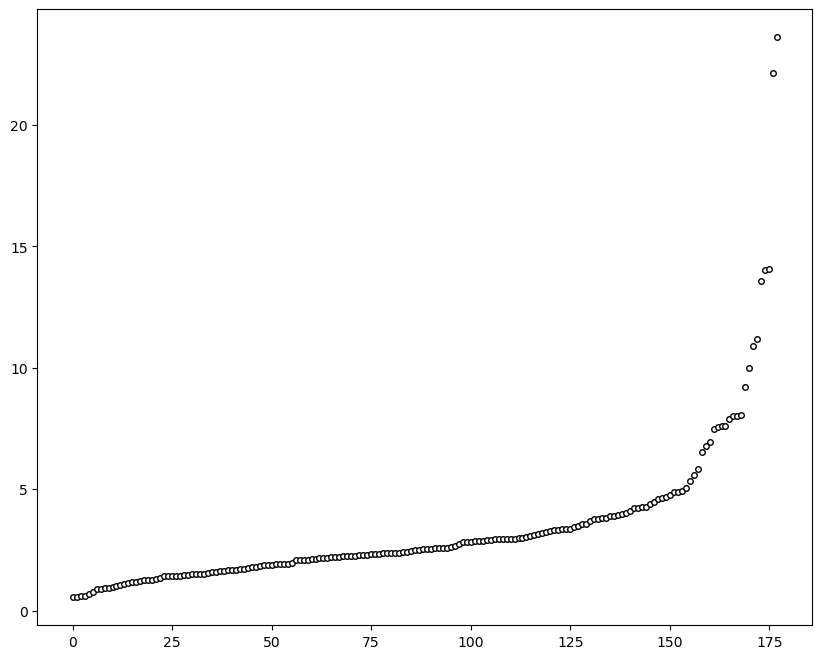

0.9189739237528227 [-0.01785624  0.53689027 -0.21417556  0.06085938 -0.35179672  0.19806837
  0.15229481 -0.20330093  0.3990565   0.0659257  -0.42777138  0.18412076
 -0.23207083]


In [19]:
a4_0, L4_0 = pca.find_pc(X4_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4_0, a4_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4_0, a4_0)

0.8876404494382022


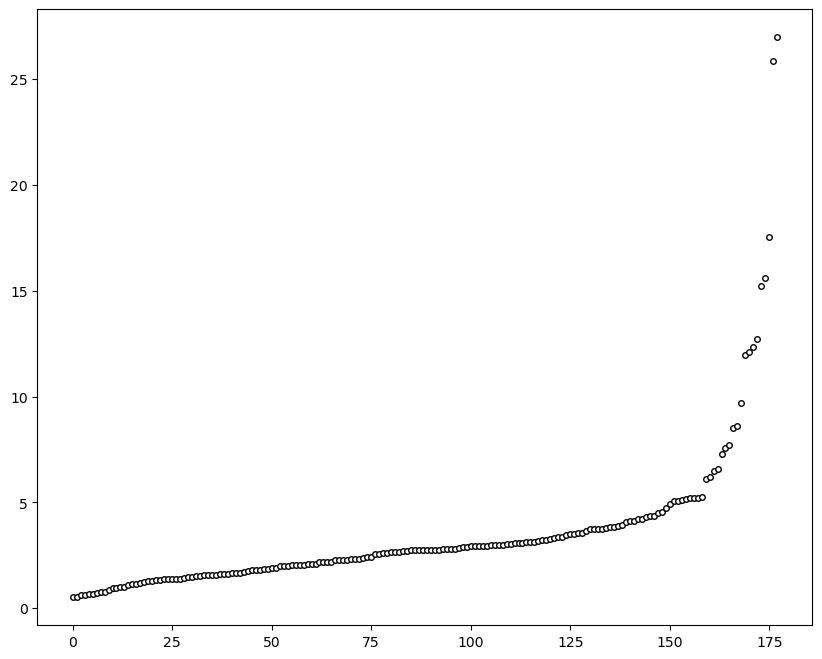

0.7666191076036115 [ 0.19928371 -0.35358493 -0.0219883  -0.29241943  0.07347939 -0.16530731
 -0.12165777  0.48746594 -0.34769435 -0.06521992  0.50119942 -0.19677789
  0.22148209]


In [20]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a4, L4 = pca.find_rob_pc(X4, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4, a4)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4, a4)
U4 = pca.project_line(X0, a4)
U4_0 = pca.project_line(X0, a4_0)

In [21]:
X5_0 = pca.project(X4_0, a4_0)
X5 = pca.project(X4, a4)

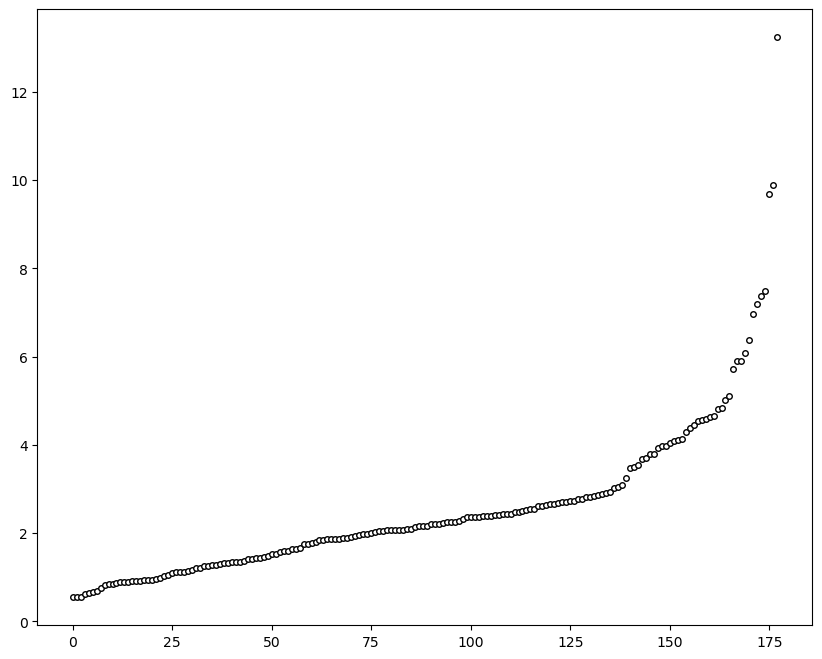

0.8532281783543193 [ 0.26566364 -0.03521376  0.1430255  -0.06610295 -0.72704845  0.14931838
  0.10902581  0.50070304 -0.13685986  0.07643679  0.1736146   0.10116094
  0.15786884]


In [22]:
a5_0, L5_0 = pca.find_pc(X5_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5_0, a5_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5_0, a5_0)

0.8876404494382022


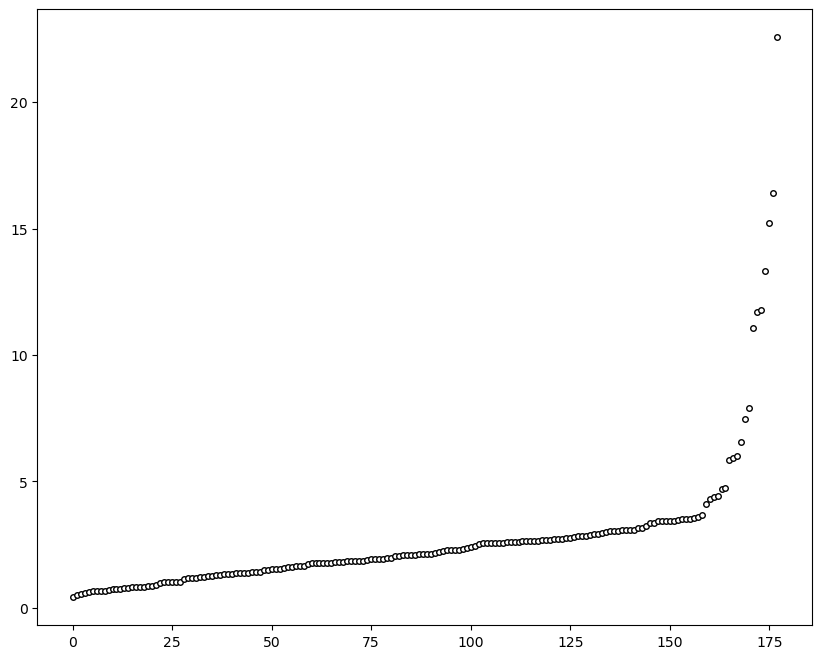

0.6874641833166084 [ 0.20030339  0.34913128 -0.11491471 -0.05357698 -0.57120508  0.12769089
  0.11230833  0.56356177  0.31190731  0.10315125 -0.0242308   0.1619543
  0.1198837 ]


In [23]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a5, L5 = pca.find_rob_pc(X5, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5, a5)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5, a5)
U5 = pca.project_line(X0, a5)
U5_0 = pca.project_line(X0, a5_0)

In [57]:
from sklearn.decomposition import PCA

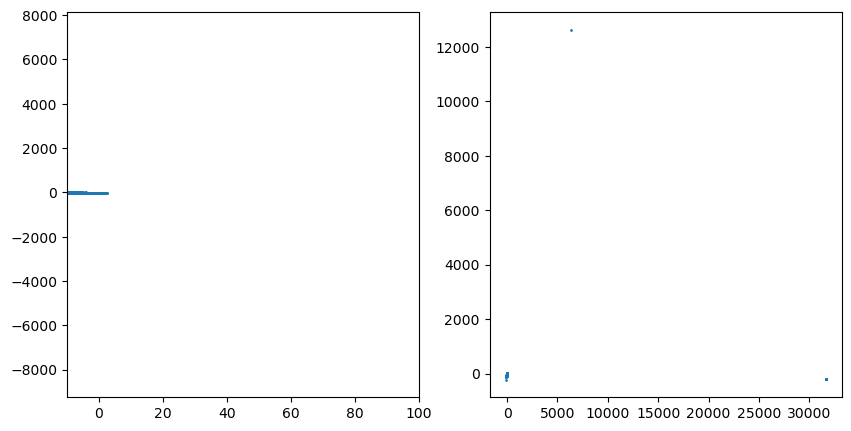

In [69]:
pca1 = PCA()
pca1.fit(X0)
U = pca1.transform(X0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(-U1, -U2, s=1)
plt.xlim(-10, 100)
plt.subplot(1,2,2)
plt.scatter(U[:,0], U[:,1], s=1)
plt.show()

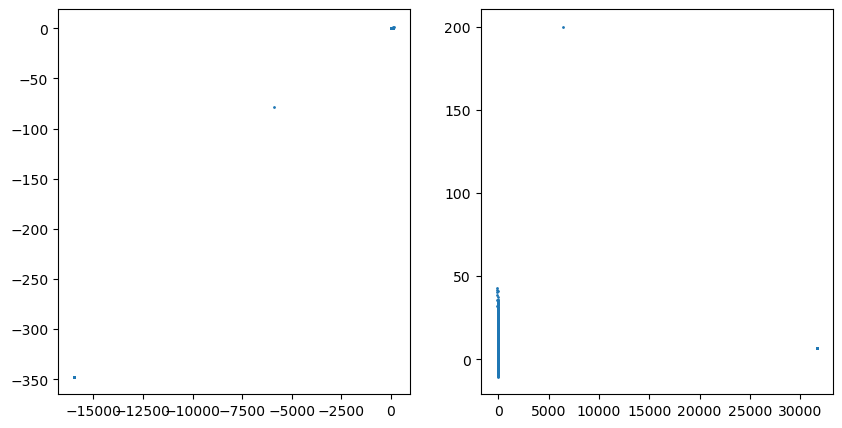

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U3, s=1)
plt.subplot(1,2,2)
plt.scatter(U[:,0], U[:,2], s=1)
plt.show()

In [59]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [63]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=0.95)
As, Ls, Us = pca.find_rob_pc_all(X1, wma)

0.9999204185981736


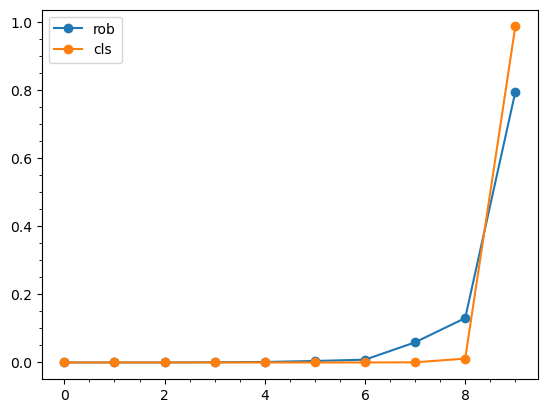

In [64]:
plt.plot(sorted(Ls/Ls.sum()), marker='o', label='rob')
plt.plot(sorted(Ls_0/Ls_0.sum()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [38]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

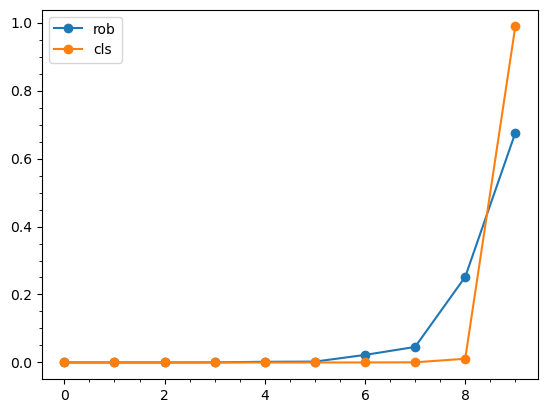

In [39]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [44]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [48]:
S = robust_scatter_matrix(X1, wma)
# print(S)

In [49]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.34480778 0.13347941 0.11208188 0.08932816 0.07881752 0.07484204
 0.00382249 0.00690471 0.01167033 0.01865011 0.05082278 0.03565056
 0.03912223]
